In [3]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [8]:
train_dir = './train'
test_dir = './test'

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [25]:
model = tf.keras.Sequential([
    # Primera capa convolucional
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Segunda capa convolucional
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Aplanar las características para la capa densa
    tf.keras.layers.Flatten(),

    # Primera capa densa
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Capa de salida con dos neuronas (clasificación binaria)
    tf.keras.layers.Dense(2, activation='softmax')
])


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,708,002 (14.14 MB)

 Trainable params: 3,708,002 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# liberar memoria para amenizar el proceso de entrenamiento
# Liberar la memoria de la GPU
backend.clear_session()


In [29]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

In [43]:
# Ajustar el modelo
history = model.fit(
    train_generator,
    #steps_per_epoch=45,
    steps_per_epoch=60,
    epochs=20,
    validation_data=test_generator,
    #validation_steps=45
    validation_steps=60
)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 31s 516ms/step - accuracy: 0.8550 - loss: 0.3500 - val_accuracy: 0.7885 - val_loss: 0.5214
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 440ms/step - accuracy: 0.8483 - loss: 0.3564 - val_accuracy: 0.7625 - val_loss: 0.5429
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 34s 574ms/step - accuracy: 0.8266 - loss: 0.3841 - val_accuracy: 0.7760 - val_loss: 0.4998
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 455ms/step - accuracy: 0.8408 - loss: 0.3550 - val_accuracy: 0.7750 - val_loss: 0.5075
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 35s 584ms/step - accuracy: 0.8585 - loss: 0.3381 - val_accuracy: 0.8130 - val_loss: 0.4767
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 28s 462ms/step - accuracy: 0.8563 - loss: 0.3502 - val_accuracy: 0.7375 - val_loss: 0.5334
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.8352 - loss: 0.3936 - val_accuracy: 0.7469 - val_loss: 0.4935
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 29s 471ms/step - accuracy: 0.8563 - loss: 0.3373 - val_accu

In [44]:
# Guardar el modelo completo
model.save('models/noveno_cnn.h5')

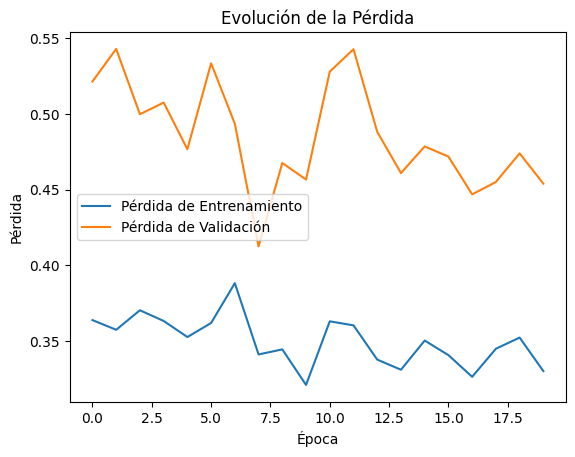

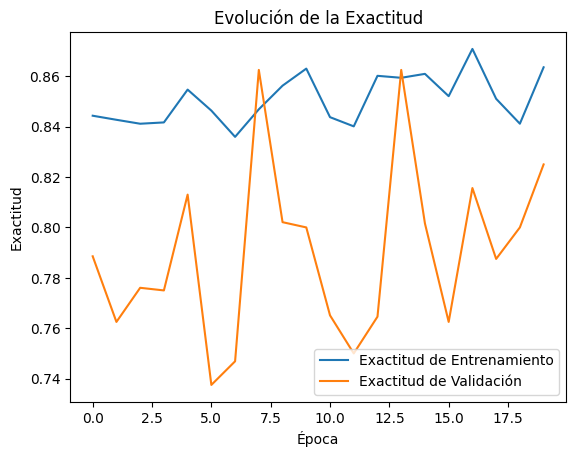

In [45]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la exactitud
plt.plot(history.history['accuracy'], label='Exactitud de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud de Validación')
plt.title('Evolución de la Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

In [11]:
from IPython.display import display, HTML

html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Gráficas</title>
</head>
<body>
    <p>Esto no es exactamente lo que buscamos, ya que la gráfica que estamos buscando se parece más a esta:</p>
    <img src="img/perdida.png" alt="Gráfica Correcta" width="250">
    <img src="img/bien_entrenado.png" alt="Gráfica Correcta" width="250">
</body>
</html>
"""

# Mostrar el contenido HTML en el notebook
display(HTML(html_content))

Crearemos un nuevo modelo con menos capas para ver que resultado obtenemos

In [46]:
# Mostrar precision y perdida del modelo
loss, acc = model.evaluate(test_generator)
print(f'Pérdida: {loss}')
print(f'Exactitud: {acc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.8025 - loss: 0.4587
Pérdida: 0.45582735538482666
Exactitud: 0.8069999814033508


## Curva ROC

In [1]:
# Importar las bibliotecas necesarias para calcular y graficar la curva ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Leer el modelo
model = tf.keras.models.load_model('models/noveno_cnn.h5')

In [12]:
# Calcular el número de pasos necesarios para recorrer todo el conjunto de prueba
steps_test = int(np.ceil(test_generator.samples / test_generator.batch_size))

# Realizar predicciones usando el conjunto de prueba
y_pred_prob = model.predict(test_generator, steps=steps_test, verbose=1)

c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step


In [13]:
# Obtener las etiquetas verdaderas del generador de prueba
y_true = test_generator.classes

In [14]:
# Asegurarse de que las etiquetas verdaderas (y_true) y las predicciones (y_pred_prob) tengan la misma longitud
#assert len(y_true) == len(y_pred_prob), "Las predicciones y las etiquetas verdaderas tienen diferente número de muestras."

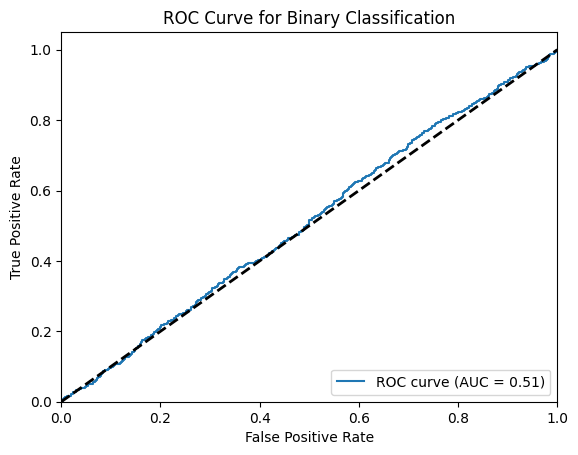

In [15]:
# Extraer las probabilidades para la clase positiva (por ejemplo, Maligno, que está en la segunda columna)
y_pred_prob_positive = y_pred_prob[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob_positive)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc='lower right')
plt.show()